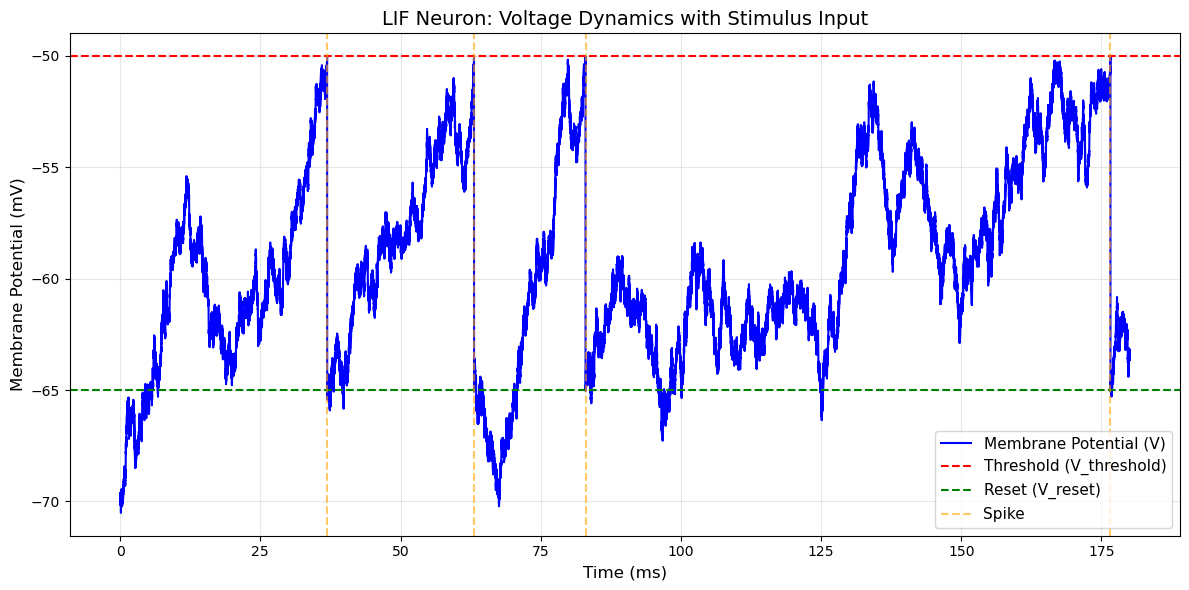

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential after spike (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 20.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 3e-4  # 2 ms, for example, if stimulus matches a 500 Hz sampling rate
bias_current = 2  # Constant depolarizing current (nA)

# Load stimulus data
stim_file_path = 'stim.dat'  # Replace with your file path if needed
stim = np.loadtxt(stim_file_path)

# Simulation parameters
T = len(stim) * dt  # Total simulation time based on the stimulus length
time = np.arange(0, T, dt)  # Time array

# Function to simulate LIF neuron with stimulus input
def simulate_lif_with_stimulus(stimulus, strength):
    V = E_L  # Initialize membrane potential
    spikes = []  # List to store spike times
    voltages = []  # Store membrane potential for plotting

    for t_idx, t in enumerate(time):
        # Compute synaptic current from stimulus
        I_e = strength * stimulus[t_idx] + bias_current

        # Update membrane potential using Euler's method
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

        # Store the voltage for plotting
        voltages.append(V)

    return time, np.array(voltages), spikes

# Simulate the LIF neuron with the stimulus
synaptic_strength = 2.0  # Set synaptic strength
time, voltages, spikes = simulate_lif_with_stimulus(stim, synaptic_strength)

# Plot the voltage dynamics
plt.figure(figsize=(12, 6))
plt.plot(time, voltages, label="Membrane Potential (V)", color="blue")
plt.axhline(V_threshold, color="red", linestyle="--", label="Threshold (V_threshold)")
plt.axhline(V_reset, color="green", linestyle="--", label="Reset (V_reset)")

# Highlight spikes
for spike_time in spikes:
    plt.axvline(spike_time, color="orange", linestyle="--", alpha=0.6, label="Spike" if spike_time == spikes[0] else None)

# Customize the plot
plt.title("LIF Neuron: Voltage Dynamics with Stimulus Input", fontsize=14)
plt.xlabel("Time (ms)", fontsize=12)
plt.ylabel("Membrane Potential (mV)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


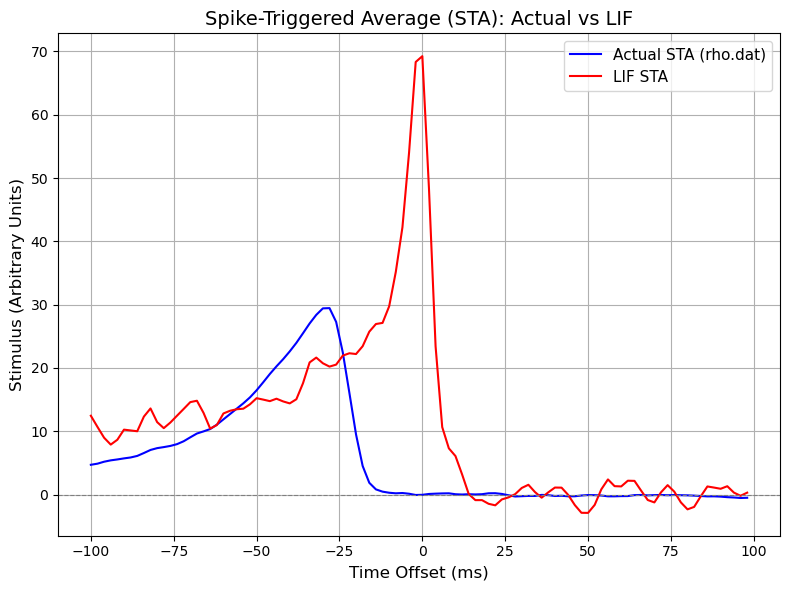

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus and spike train data
stim_file_path = 'stim.dat'  # Path to stim.dat
rho_file_path = 'rho.dat'    # Path to rho.dat
stim = np.loadtxt(stim_file_path)
rho = np.loadtxt(rho_file_path)

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 5.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 2e-3  # 2 ms time step (matches stim.dat sampling interval)
bias_current = 2.0  # Constant depolarizing current (nA)
synaptic_strength = 5  # Synaptic strength

# Time array
T = len(stim) * dt  # Total simulation time (based on stimulus length)
time = np.arange(0, T, dt)

# Simulate LIF neuron
def simulate_lif_with_stimulus(stimulus, strength):
    V = E_L  # Initialize membrane potential
    spikes = []  # Store spike times

    for t_idx, t in enumerate(time):
        # Compute synaptic current from stimulus
        I_e = strength * stimulus[t_idx] + bias_current

        # Update membrane potential using Euler's method
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)  # Return spike times

# Simulate the LIF neuron and get spike times
lif_spike_times = simulate_lif_with_stimulus(stim, synaptic_strength)

# Extract spike times from rho.dat
actual_spike_times = np.where(rho == 1)[0] * dt  # Convert indices to time in seconds

# Define parameters for STA calculation
time_window = 0.1  # 100 ms before and after
window_steps = int(time_window / dt)  # Number of steps in the window
time_offsets = np.arange(-window_steps, window_steps) * dt  # Time offsets (-100 to +100 ms)

# Calculate Spike-Triggered Average (STA) function
def calculate_sta(spike_times, stim):
    sta = np.zeros(2 * window_steps)  # Initialize STA array

    for spike_time in spike_times:
        spike_index = int(spike_time / dt)
        if spike_index >= window_steps and spike_index + window_steps < len(stim):  # Ensure valid window
            sta += stim[spike_index - window_steps:spike_index + window_steps]

    return sta / len(spike_times) if len(spike_times) > 0 else np.zeros_like(sta)

# Calculate STA for actual spikes and LIF spikes
actual_sta = calculate_sta(actual_spike_times, stim)
lif_sta = calculate_sta(lif_spike_times, stim)

# Plot the Spike-Triggered Averages
plt.figure(figsize=(8, 6))
plt.plot(time_offsets * 1000, actual_sta, label="Actual STA (rho.dat)", color="blue", linestyle="-")  # Convert to ms
plt.plot(time_offsets * 1000, lif_sta, label="LIF STA", color="red", linestyle="-")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel("Time Offset (ms)", fontsize=12)
plt.ylabel("Stimulus (Arbitrary Units)", fontsize=12)
plt.title("Spike-Triggered Average (STA): Actual vs LIF", fontsize=14)
plt.grid(True)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


Number of spikes: 17589
Spike times: [3.200000e-02 3.400000e-02 3.600000e-02 ... 1.199578e+03 1.199598e+03
 1.199602e+03]
Interval 2 ms - Adjacent pairs: 1496
Interval 2 ms - Non-adjacent pairs: 1502
Interval 4 ms - Adjacent pairs: 4821
Interval 4 ms - Non-adjacent pairs: 5309
Interval 10 ms - Adjacent pairs: 763
Interval 10 ms - Non-adjacent pairs: 2199
Interval 20 ms - Adjacent pairs: 330
Interval 20 ms - Non-adjacent pairs: 1762
Interval 50 ms - Adjacent pairs: 80
Interval 50 ms - Non-adjacent pairs: 1176


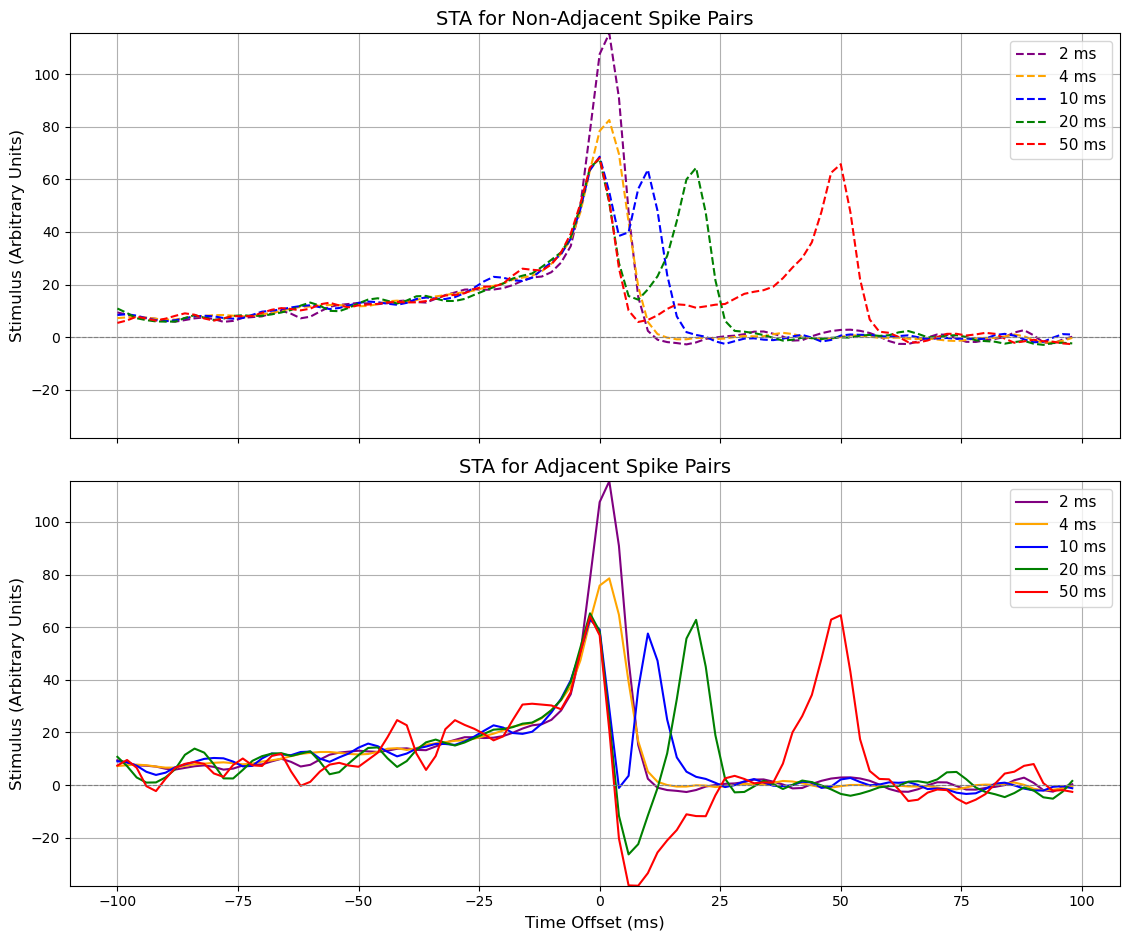

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus data
stim_file_path = 'stim.dat'  # Path to stim.dat
stim = np.loadtxt(stim_file_path)

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 1.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 2e-3  # 2 ms time step (match stim.dat sampling interval)
bias_current = 20.0  # Constant depolarizing current (nA)
synaptic_strength = 7.0  # Synaptic strength

# Time array
T = len(stim) * dt  # Total simulation time (based on stimulus length)
time = np.arange(0, T, dt)

# Simulate LIF neuron
def simulate_lif_with_stimulus(stimulus, strength):
    V = E_L  # Initialize membrane potential
    spikes = []  # Store spike times

    for t_idx, t in enumerate(time):
        # Compute synaptic current from stimulus
        I_e = strength * stimulus[t_idx] + bias_current

        # Update membrane potential using Euler's method
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)  # Return spike times

# Simulate the LIF neuron and get spike times
spike_times = simulate_lif_with_stimulus(stim, synaptic_strength)
# Debugging
print(f"Number of spikes: {len(spike_times)}")
print("Spike times:", spike_times)

# Parameters for STA calculation
time_window = 0.1  # 100 ms before and after
window_steps = int(time_window / dt)  # Number of steps in the window
time_offsets = np.arange(-window_steps, window_steps) * dt  # Time offsets (-100 to +100 ms)

# Optimized STA calculation function
def calculate_sta_for_spike_pairs(spike_times, stim, interval, sampling_interval, adjacent_only=False):
    interval_steps = int(interval / sampling_interval)  # Convert interval to steps
    sta = np.zeros(2 * window_steps)  # Initialize STA array
    count = 0

    spike_indices = (spike_times / sampling_interval).astype(int)

    if adjacent_only:
        # For adjacent spike pairs only
        for i in range(len(spike_indices) - 1):
            if spike_indices[i + 1] - spike_indices[i] == interval_steps:
                if spike_indices[i] >= window_steps and spike_indices[i] + window_steps < len(stim):
                    sta += stim[spike_indices[i] - window_steps:spike_indices[i] + window_steps]
                    count += 1
        print(f"Interval {interval * 1000:.0f} ms - Adjacent pairs: {count}")
    else:
        # For all possible spike pairs
        for i in range(len(spike_indices)):
            valid_indices = np.where(
                (spike_indices > spike_indices[i]) &
                (spike_indices - spike_indices[i] == interval_steps)
            )[0]
            for j in valid_indices:
                if spike_indices[i] >= window_steps and spike_indices[i] + window_steps < len(stim):
                    sta += stim[spike_indices[i] - window_steps:spike_indices[i] + window_steps]
                    count += 1
        print(f"Interval {interval * 1000:.0f} ms - Non-adjacent pairs: {count}")


    return sta / count if count > 0 else np.zeros_like(sta)

# Define intervals and calculate STAs for both scenarios
intervals = [2e-3, 4e-3, 10e-3, 20e-3, 50e-3]  # 2 ms, 4 ms, 10 ms, 20 ms, 50 ms
colors = {
    2e-3: 'purple',
    4e-3: 'orange',
    10e-3: 'blue',
    20e-3: 'green',
    50e-3: 'red',
}
stas_adjacent = {}
stas_non_adjacent = {}

for interval in intervals:
    stas_adjacent[interval] = calculate_sta_for_spike_pairs(spike_times, stim, interval, dt, adjacent_only=True)
    stas_non_adjacent[interval] = calculate_sta_for_spike_pairs(spike_times, stim, interval, dt, adjacent_only=False)

# Define y-axis limits for consistent plotting
y_min = min(
    min(stas_adjacent[interval].min(), stas_non_adjacent[interval].min()) for interval in intervals
)
y_max = max(
    max(stas_adjacent[interval].max(), stas_non_adjacent[interval].max()) for interval in intervals
)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, sharey=True)

# Plot Non-Adjacent STAs
axes[0].set_title("STA for Non-Adjacent Spike Pairs", fontsize=14)
for interval in intervals:
    axes[0].plot(
        time_offsets * 1000,  # Convert to milliseconds
        stas_non_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='--',
    )
axes[0].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[0].legend(fontsize=11)
axes[0].grid(True)

# Plot Adjacent STAs
axes[1].set_title("STA for Adjacent Spike Pairs", fontsize=14)
for interval in intervals:
    axes[1].plot(
        time_offsets * 1000,  # Convert to milliseconds
        stas_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='-',
    )
axes[1].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[1].legend(fontsize=11)
axes[1].grid(True)

# Set common labels and limits
for ax in axes:
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Stimulus (Arbitrary Units)", fontsize=12)

axes[1].set_xlabel("Time Offset (ms)", fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()


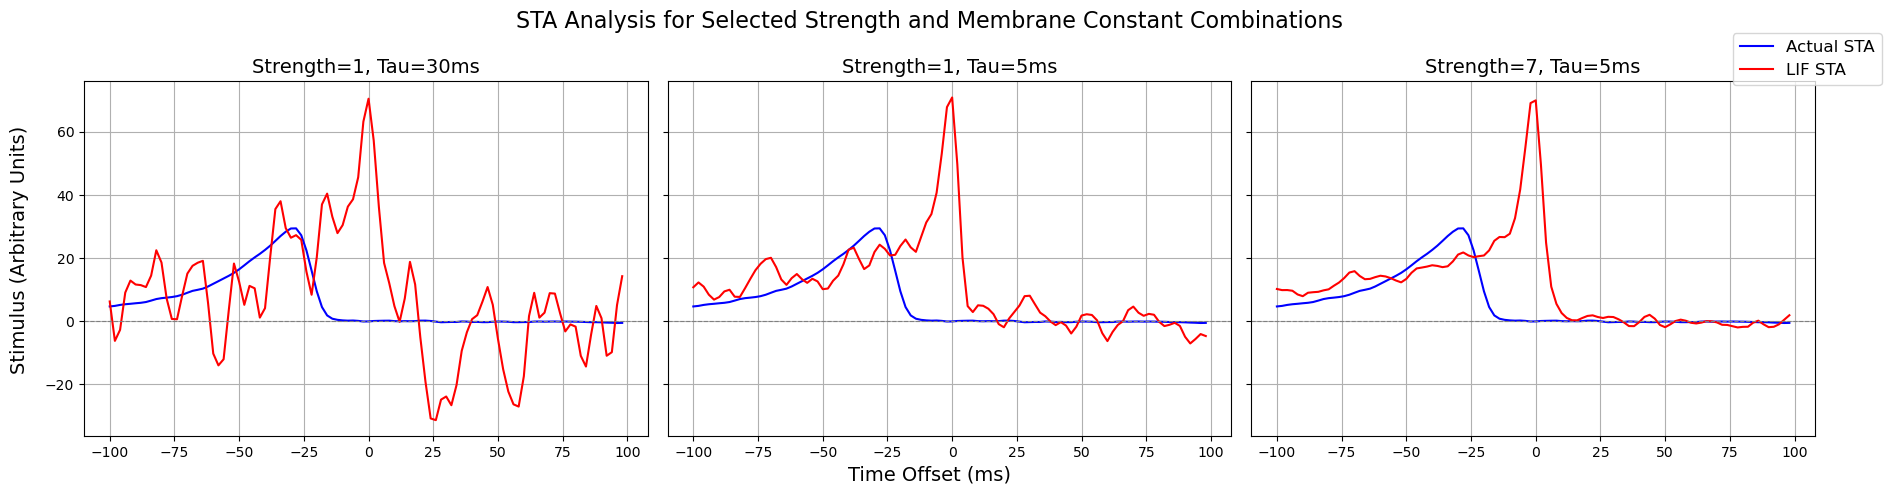

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus and spike train data
stim_file_path = 'stim.dat'  # Path to stim.dat
rho_file_path = 'rho.dat'    # Path to rho.dat
stim = np.loadtxt(stim_file_path)
rho = np.loadtxt(rho_file_path)

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 2e-3  # 2 ms time step (matches stim.dat sampling interval)
bias_current = 2.0  # Constant depolarizing current (nA)

# Time array
T = len(stim) * dt  # Total simulation time (based on stimulus length)
time = np.arange(0, T, dt)

# Simulate LIF neuron
def simulate_lif_with_stimulus(stimulus, strength, tau_m):
    V = E_L  # Initialize membrane potential
    spikes = []  # Store spike times

    for t_idx, t in enumerate(time):
        # Compute synaptic current from stimulus
        I_e = strength * stimulus[t_idx] + bias_current

        # Update membrane potential using Euler's method
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)  # Return spike times

# Extract spike times from rho.dat
actual_spike_times = np.where(rho == 1)[0] * dt  # Convert indices to time in seconds

# Define parameters for STA calculation
time_window = 0.1  # 100 ms before and after
window_steps = int(time_window / dt)  # Number of steps in the window
time_offsets = np.arange(-window_steps, window_steps) * dt  # Time offsets (-100 to +100 ms)

# Calculate Spike-Triggered Average (STA) function
def calculate_sta(spike_times, stim):
    sta = np.zeros(2 * window_steps)  # Initialize STA array

    for spike_time in spike_times:
        spike_index = int(spike_time / dt)
        if spike_index >= window_steps and spike_index + window_steps < len(stim):  # Ensure valid window
            sta += stim[spike_index - window_steps:spike_index + window_steps]

    return sta / len(spike_times) if len(spike_times) > 0 else np.zeros_like(sta)

# Set up grid of parameters for synaptic strength and tau_m
synaptic_strengths = [1, 7]
tau_ms = [30, 5]

# Create a 3x1 grid of subplots with shared x and y axes
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle("STA Analysis for Selected Strength and Membrane Constant Combinations", fontsize=16)

# Define the specific combinations for each subplot
combinations = [
    (synaptic_strengths[0], tau_ms[0]),  # First value of both strength and tau
    (synaptic_strengths[0], tau_ms[1]),  # First strength, second tau
    (synaptic_strengths[1], tau_ms[1]),  # Second strength, second tau
]

# Iterate through the combinations and subplots
for idx, (strength, tau_m) in enumerate(combinations):
    # Simulate LIF neuron
    lif_spike_times = simulate_lif_with_stimulus(stim, strength, tau_m)
    
    # Calculate STA
    lif_sta = calculate_sta(lif_spike_times, stim)
    actual_sta = calculate_sta(actual_spike_times, stim)

    # Plot the STA for this combination
    ax = axes[idx]
    ax.plot(time_offsets * 1000, actual_sta, label="Actual STA", color="blue", linestyle="-")  # Convert to ms
    ax.plot(time_offsets * 1000, lif_sta, label="LIF STA", color="red", linestyle="-")
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.set_title(f"Strength={strength}, Tau={tau_m}ms", fontsize=14)
    ax.grid(True)

# Collect handles and labels from one of the plots
handles, labels = axes[0].get_legend_handles_labels()

# Add a shared legend
fig.legend(
    handles, 
    labels, 
    loc="upper right", 
    bbox_to_anchor=(0.98, 0.95),  # Position relative to the figure
    fontsize=12,
    frameon=True  # Add a legend box
)

# Add shared x and y labels
fig.text(0.5, 0.04, "Time Offset (ms)", ha="center", fontsize=14)
fig.text(0.04, 0.5, "Stimulus (Arbitrary Units)", va="center", rotation="vertical", fontsize=14)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.99])
plt.show()



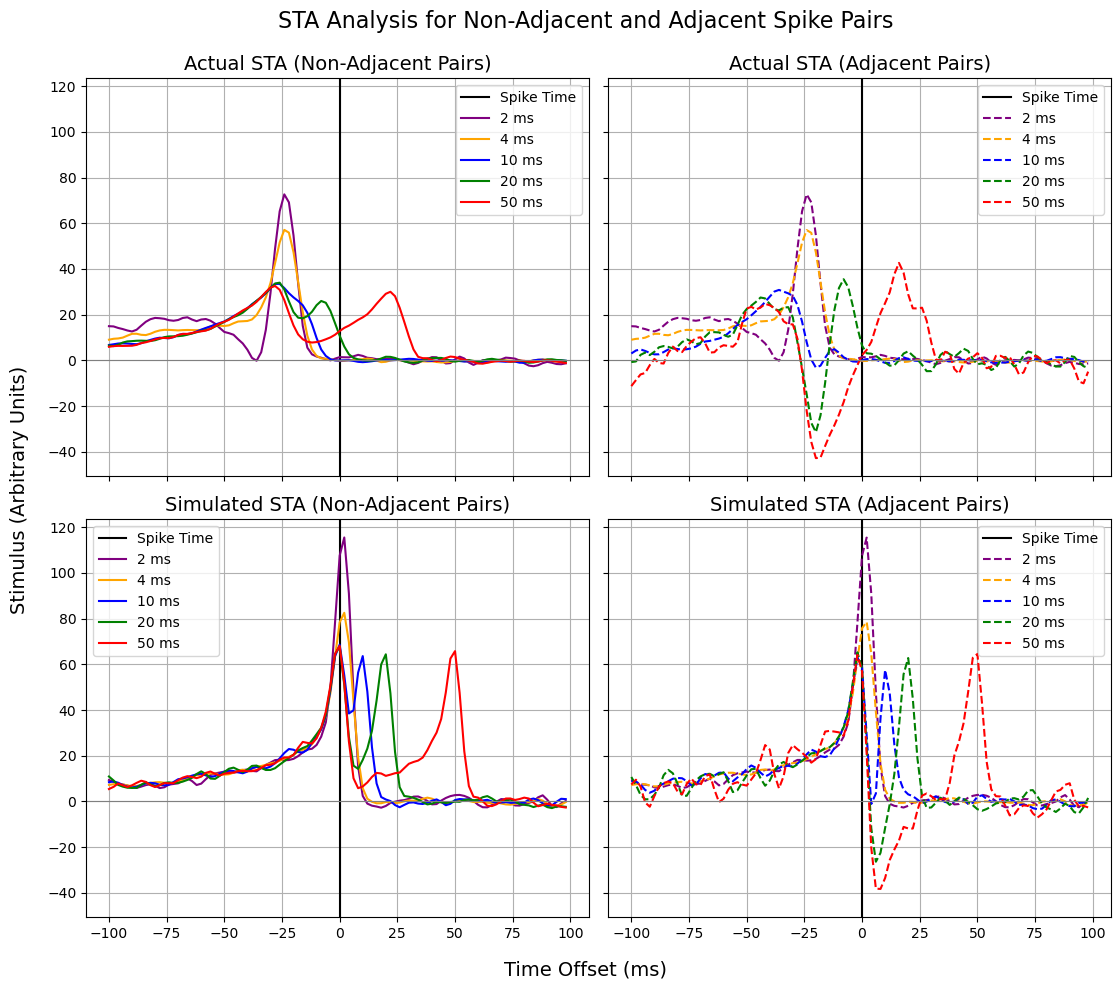

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus and spike train data
rho_file_path = 'rho.dat'
stim_file_path = 'stim.dat'
rho = np.loadtxt(rho_file_path)
stim = np.loadtxt(stim_file_path)

# Constants
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 1.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 2e-3  # Sampling interval (2 ms)
bias_current = 20.0  # Constant depolarizing current (nA)
synaptic_strength = 7.0  # Synaptic strength

time_window = 0.1  # 100 ms window
window_steps = int(time_window / dt)  # Number of steps in the window
time_offsets = np.arange(-window_steps, window_steps) * dt  # Time offsets

intervals = [2e-3, 4e-3, 10e-3, 20e-3, 50e-3]  # Spike pair intervals
colors = {
    2e-3: 'purple',
    4e-3: 'orange',
    10e-3: 'blue',
    20e-3: 'green',
    50e-3: 'red',
}

# Extract spike times from rho.dat
actual_spike_times = np.where(rho == 1)[0] * dt  # Convert indices to time in seconds

# Simulate LIF neuron
def simulate_lif_with_stimulus(stimulus, strength):
    V = E_L  # Initialize membrane potential
    spikes = []  # Store spike times

    for t_idx, t in enumerate(np.arange(0, len(stimulus) * dt, dt)):
        # Compute synaptic current from stimulus
        I_e = strength * stimulus[t_idx] + bias_current

        # Update membrane potential using Euler's method
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)  # Return spike times

simulated_spike_times = simulate_lif_with_stimulus(stim, synaptic_strength)

# Optimized STA calculation function
def calculate_sta_for_spike_pairs(spike_times, stim, interval, sampling_interval, adjacent_only=False):
    interval_steps = int(interval / sampling_interval)  # Convert interval to steps
    sta = np.zeros(2 * window_steps)  # Initialize STA array
    count = 0

    spike_indices = (spike_times / sampling_interval).astype(int)

    if adjacent_only:
        # For adjacent spike pairs only
        for i in range(len(spike_indices) - 1):
            if spike_indices[i + 1] - spike_indices[i] == interval_steps:
                if spike_indices[i] >= window_steps and spike_indices[i] + window_steps < len(stim):
                    sta += stim[spike_indices[i] - window_steps:spike_indices[i] + window_steps]
                    count += 1
    else:
        # For all possible spike pairs
        for i in range(len(spike_indices)):
            valid_indices = np.where(
                (spike_indices > spike_indices[i]) &
                (spike_indices - spike_indices[i] == interval_steps)
            )[0]
            for j in valid_indices:
                if spike_indices[i] >= window_steps and spike_indices[i] + window_steps < len(stim):
                    sta += stim[spike_indices[i] - window_steps:spike_indices[i] + window_steps]
                    count += 1

    return sta / count if count > 0 else np.zeros_like(sta)

# Calculate STAs for adjacent and non-adjacent spike pairs
stas_actual_adjacent = {}
stas_actual_non_adjacent = {}
stas_simulated_adjacent = {}
stas_simulated_non_adjacent = {}

for interval in intervals:
    stas_actual_adjacent[interval] = calculate_sta_for_spike_pairs(actual_spike_times, stim, interval, dt, adjacent_only=True)
    stas_actual_non_adjacent[interval] = calculate_sta_for_spike_pairs(actual_spike_times, stim, interval, dt, adjacent_only=False)
    stas_simulated_adjacent[interval] = calculate_sta_for_spike_pairs(simulated_spike_times, stim, interval, dt, adjacent_only=True)
    stas_simulated_non_adjacent[interval] = calculate_sta_for_spike_pairs(simulated_spike_times, stim, interval, dt, adjacent_only=False)

# Define y-axis limits for consistent plotting
y_min = min(
    min(
        stas_actual_adjacent[interval].min(),
        stas_actual_non_adjacent[interval].min(),
        stas_simulated_adjacent[interval].min(),
        stas_simulated_non_adjacent[interval].min()
    ) for interval in intervals
)
y_max = max(
    max(
        stas_actual_adjacent[interval].max(),
        stas_actual_non_adjacent[interval].max(),
        stas_simulated_adjacent[interval].max(),
        stas_simulated_non_adjacent[interval].max()
    ) for interval in intervals
)

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

# Add dashed vertical line at 0 ms labeled as "Spike Time"
for ax in axes.flat:  # Loop over all subplots
    ax.axvline(0, color='black', linestyle='-', linewidth=1.5, label="Spike Time")

# Plot Actual Non-Adjacent
axes[0, 0].set_title("Actual STA (Non-Adjacent Pairs)", fontsize=14)
for interval in intervals:
    axes[0, 0].plot(
        time_offsets * 1000,  # Convert to milliseconds
        stas_actual_non_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='-',
    )

axes[0, 0].axhline(0, color='gray', linestyle='-', linewidth=0.8)
axes[0, 0].grid(True)
axes[0, 0].legend(fontsize=10)

# Plot Actual Adjacent
axes[0, 1].set_title("Actual STA (Adjacent Pairs)", fontsize=14)
for interval in intervals:
    axes[0, 1].plot(
        time_offsets * 1000,  # Convert to milliseconds
        stas_actual_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='--',
    )
axes[0, 1].axhline(0, color='gray', linestyle='-', linewidth=0.8)
axes[0, 1].grid(True)
axes[0, 1].legend(fontsize=10)

# Plot Simulated Non-Adjacent
axes[1, 0].set_title("Simulated STA (Non-Adjacent Pairs)", fontsize=14)
for interval in intervals:
    axes[1, 0].plot(
        time_offsets * 1000,  # Convert to milliseconds
        stas_simulated_non_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='-',
    )
axes[1, 0].axhline(0, color='gray', linestyle='-', linewidth=0.8)
axes[1, 0].grid(True)
axes[1, 0].legend(fontsize=10)

# Plot Simulated Adjacent
axes[1, 1].set_title("Simulated STA (Adjacent Pairs)", fontsize=14)
for interval in intervals:
    axes[1, 1].plot(
        time_offsets * 1000,  # Convert to milliseconds
        stas_simulated_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='--',
    )
axes[1, 1].axhline(0, color='gray', linestyle='-', linewidth=0.8)
axes[1, 1].grid(True)
axes[1, 1].legend(fontsize=10)

# Add shared x-axis and y-axis labels
fig.supxlabel("Time Offset (ms)", fontsize=14)
fig.supylabel("Stimulus (Arbitrary Units)", fontsize=14)

# Adjust layout and show the plot
plt.tight_layout(rect=[0.01, 0.0, 0.95, 0.95])
plt.suptitle("STA Analysis for Non-Adjacent and Adjacent Spike Pairs", fontsize=16)
plt.show()


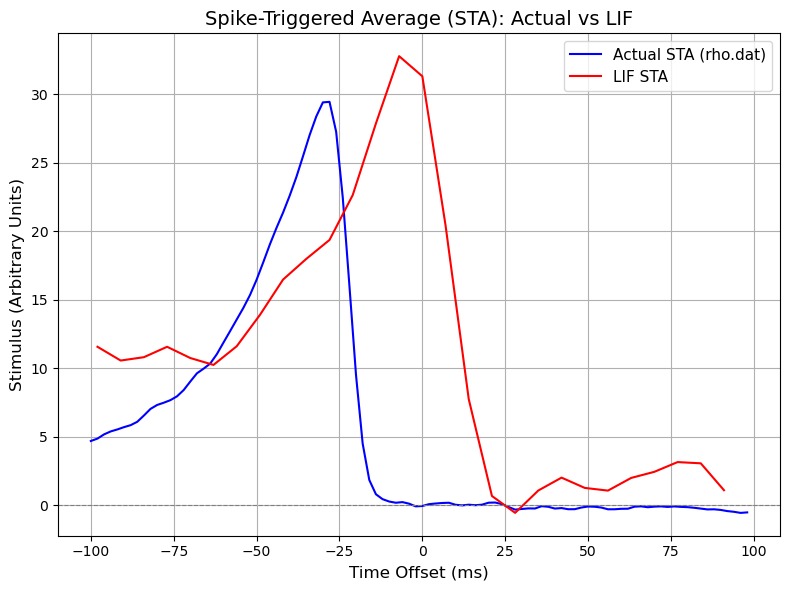

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus and spike train data
stim_file_path = 'stim.dat'  # Path to stim.dat
rho_file_path = 'rho.dat'    # Path to rho.dat
stim = np.loadtxt(stim_file_path)
rho = np.loadtxt(rho_file_path)

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 20.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 2e-3  # 2 ms time step (used for rho data)
bias_current = 2.0  # Constant depolarizing current (nA)
synaptic_strength = 30  # Synaptic strength

# Separate time step for the LIF simulation
dt_simulation = 7e-3  # Modify this for the simulation's time step
T_simulation = len(stim) * dt_simulation  # Total simulation time for the LIF model
time_simulation = np.arange(0, T_simulation, dt_simulation)  # Time array for simulation

# Function to simulate LIF neuron
def simulate_lif_standard_euler(stimulus, strength, dt_simulation):
    V = E_L  # Initialize membrane potential
    spikes = []  # Store spike times

    for t_idx, t in enumerate(time_simulation):
        # Compute synaptic current from stimulus
        I_e = strength * stimulus[t_idx] + bias_current

        # Update membrane potential using Standard Euler's method
        noise_std = 5  # Adjust standard deviation as needed
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m) + np.random.normal(0, noise_std)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)

# Simulate the LIF neuron and get spike times
lif_spike_times = simulate_lif_standard_euler(stim, synaptic_strength, dt_simulation)

# Extract spike times from rho.dat
actual_spike_times = np.where(rho == 1)[0] * dt  # Convert indices to time in seconds

# Define parameters for STA calculation
time_window = 0.1  # 100 ms before and after
window_steps_actual = int(time_window / dt)  # Number of steps for actual STA
window_steps_simulation = int(time_window / dt_simulation)  # Number of steps for LIF simulation STA
time_offsets_actual = np.arange(-window_steps_actual, window_steps_actual) * dt  # Time offsets for actual
time_offsets_simulation = np.arange(-window_steps_simulation, window_steps_simulation) * dt_simulation  # Time offsets for simulation

# Calculate Spike-Triggered Average (STA) function
def calculate_sta(spike_times, stim, dt, window_steps):
    sta = np.zeros(2 * window_steps)  # Initialize STA array

    for spike_time in spike_times:
        spike_index = int(spike_time / dt)
        if spike_index >= window_steps and spike_index + window_steps < len(stim):  # Ensure valid window
            sta += stim[spike_index - window_steps:spike_index + window_steps]

    return sta / len(spike_times) if len(spike_times) > 0 else np.zeros_like(sta)

# Calculate STA for actual spikes and LIF spikes
actual_sta = calculate_sta(actual_spike_times, stim, dt, window_steps_actual)
lif_sta = calculate_sta(lif_spike_times, stim, dt_simulation, window_steps_simulation)

# Plot the Spike-Triggered Averages
plt.figure(figsize=(8, 6))
plt.plot(time_offsets_actual * 1000, actual_sta, label="Actual STA (rho.dat)", color="blue", linestyle="-")  # Convert to ms
plt.plot(time_offsets_simulation * 1000, lif_sta, label="LIF STA", color="red", linestyle="-")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel("Time Offset (ms)", fontsize=12)
plt.ylabel("Stimulus (Arbitrary Units)", fontsize=12)
plt.title("Spike-Triggered Average (STA): Actual vs LIF", fontsize=14)
plt.grid(True)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


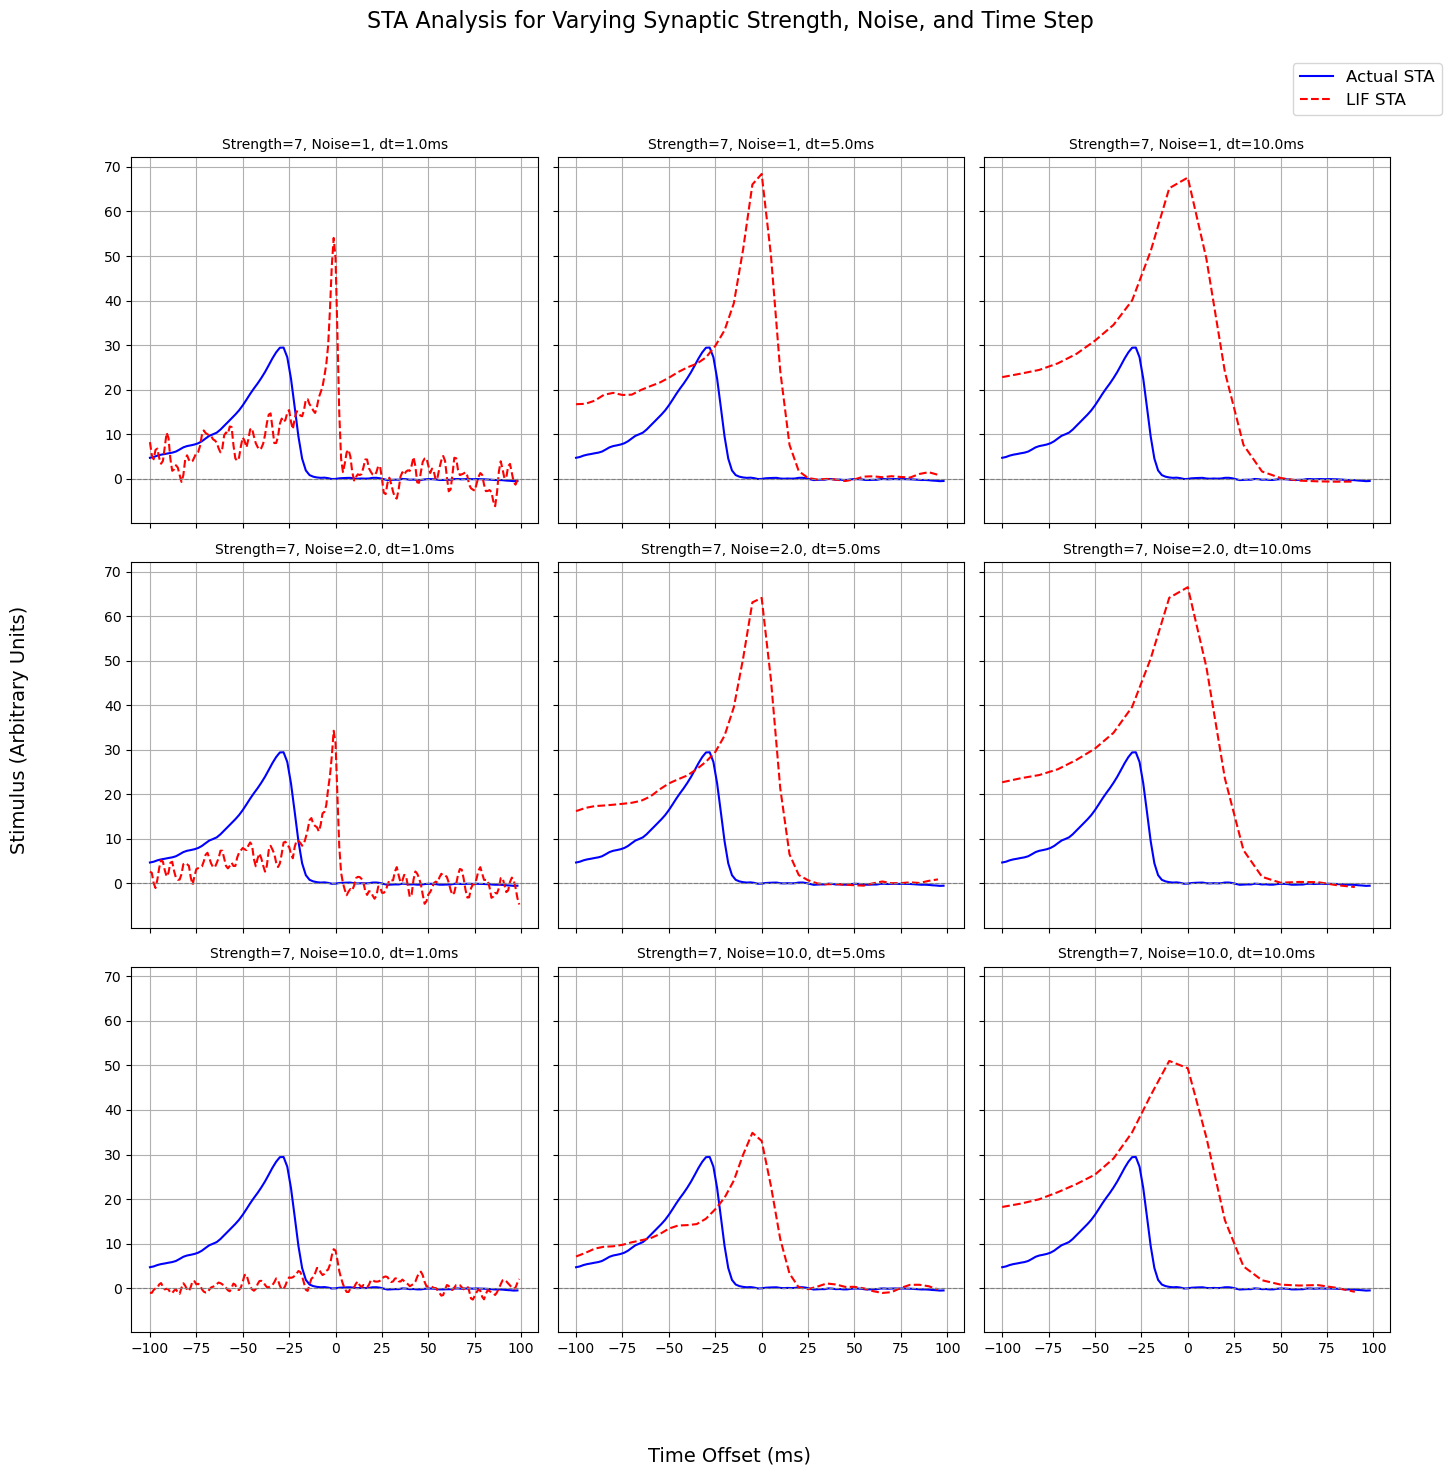

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus and spike train data
stim_file_path = 'stim.dat'  # Path to stim.dat
rho_file_path = 'rho.dat'    # Path to rho.dat
stim = np.loadtxt(stim_file_path)
rho = np.loadtxt(rho_file_path)

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 5.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
bias_current = 2.0  # Constant depolarizing current (nA)

# Define time step for the actual data
dt_actual = 2e-3  # Time step for actual data (2 ms)

# Time offsets for STA
time_window = 0.1  # 100 ms before and after
window_steps_actual = int(time_window / dt_actual)  # Steps for actual STA
time_offsets_actual = np.arange(-window_steps_actual, window_steps_actual) * dt_actual  # Time offsets for actual

# Extract actual spike times
actual_spike_times = np.where(rho == 1)[0] * dt_actual  # Convert indices to time in seconds

# STA calculation function
def calculate_sta(spike_times, stim, dt, window_steps):
    sta = np.zeros(2 * window_steps)  # Initialize STA array

    for spike_time in spike_times:
        spike_index = int(spike_time / dt)
        if spike_index >= window_steps and spike_index + window_steps < len(stim):  # Ensure valid window
            sta += stim[spike_index - window_steps:spike_index + window_steps]

    return sta / len(spike_times) if len(spike_times) > 0 else np.zeros_like(sta)

# Calculate actual STA
actual_sta = calculate_sta(actual_spike_times, stim, dt_actual, window_steps_actual)

# Function to simulate LIF neuron with noise and varying time step
def simulate_lif_with_noise(stimulus, strength, noise_std, dt_simulation):
    T_simulation = len(stim) * dt_simulation  # Total simulation time
    time_simulation = np.arange(0, T_simulation, dt_simulation)  # Time array for simulation

    V = E_L  # Initialize membrane potential
    spikes = []  # Store spike times

    for t_idx, t in enumerate(time_simulation):
        # Compute synaptic current from stimulus
        I_e = strength * stimulus[t_idx] + bias_current

        # Update membrane potential using Euler's method with noise
        dV = ((E_L - V) + R_m * I_e) * (dt_simulation / tau_m) + np.random.normal(0, noise_std)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)

# Define parameter combinations
synaptic_strengths = 10
noise_stds = [1, 2.0, 10.0]  # Noise standard deviations
dt_simulations = [1e-3, 5e-3, 1e-2]  # Simulation time steps (1 ms, 5 ms, 10 ms)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("STA Analysis for Varying Synaptic Strength, Noise, and Time Step", fontsize=16)

for i, noise_std in enumerate(noise_stds):
    for j, dt_simulation in enumerate(dt_simulations):
        # Simulate LIF neuron
        lif_spike_times = simulate_lif_with_noise(stim, strength, noise_std, dt_simulation)

        # Calculate simulation-specific STA parameters
        window_steps_simulation = int(time_window / dt_simulation)  # Steps for LIF simulation STA
        time_offsets_simulation = np.arange(-window_steps_simulation, window_steps_simulation) * dt_simulation  # Time offsets
        lif_sta = calculate_sta(lif_spike_times, stim, dt_simulation, window_steps_simulation)

        # Plot the STA for this combination
        ax = axes[i, j]
        ax.plot(time_offsets_actual * 1000, actual_sta, label="Actual STA", color="blue", linestyle="-")
        ax.plot(time_offsets_simulation * 1000, lif_sta, label="LIF STA", color="red", linestyle="--")
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        ax.set_title(f"Strength={strength}, Noise={noise_std}, dt={dt_simulation*1000:.1f}ms", fontsize=10)
        ax.grid(True)

# Add shared x and y labels
fig.supxlabel("Time Offset (ms)", fontsize=14)
fig.supylabel("Stimulus (Arbitrary Units)", fontsize=14)

# Add a legend to the last plot
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.98, 0.95), fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.93])
plt.show()


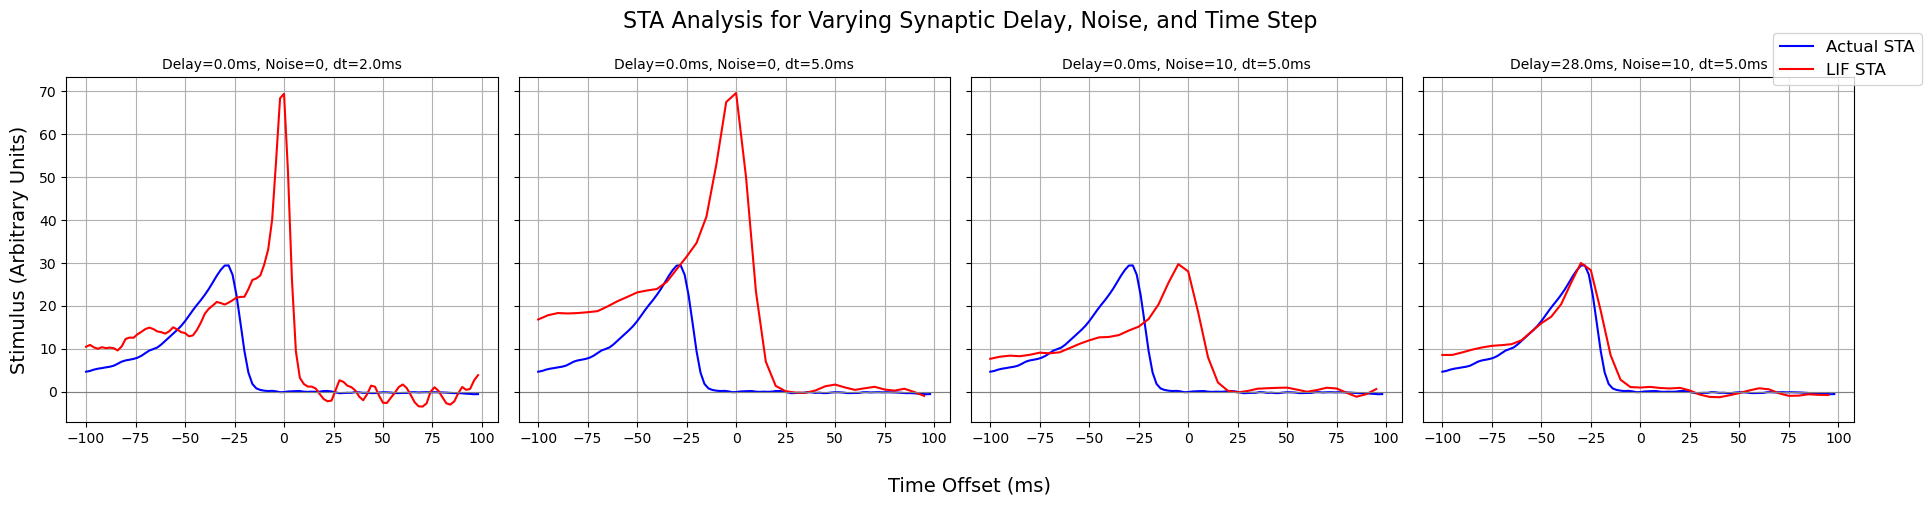

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus and spike train data
stim_file_path = 'stim.dat'  # Path to stim.dat
rho_file_path = 'rho.dat'    # Path to rho.dat
stim = np.loadtxt(stim_file_path)
rho = np.loadtxt(rho_file_path)

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 5.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
bias_current = 2.0  # Constant depolarizing current (nA)

# Define time step for the actual data
dt_actual = 2e-3  # Time step for actual data (2 ms)

# Time offsets for STA
time_window = 0.1  # 100 ms before and after
window_steps_actual = int(time_window / dt_actual)  # Steps for actual STA
time_offsets_actual = np.arange(-window_steps_actual, window_steps_actual) * dt_actual  # Time offsets for actual

# Extract actual spike times
actual_spike_times = np.where(rho == 1)[0] * dt_actual  # Convert indices to time in seconds

# STA calculation function
def calculate_sta(spike_times, stim, dt, window_steps):
    sta = np.zeros(2 * window_steps)  # Initialize STA array

    for spike_time in spike_times:
        spike_index = int(spike_time / dt)
        if spike_index >= window_steps and spike_index + window_steps < len(stim):  # Ensure valid window
            sta += stim[spike_index - window_steps:spike_index + window_steps]

    return sta / len(spike_times) if len(spike_times) > 0 else np.zeros_like(sta)

# Calculate actual STA
actual_sta = calculate_sta(actual_spike_times, stim, dt_actual, window_steps_actual)

# Function to simulate LIF neuron with synaptic delay, noise, and varying time step
def simulate_lif_with_synaptic_delay(stimulus, strength, noise_std, dt_simulation, synaptic_delay):
    T_simulation = len(stim) * dt_simulation  # Total simulation time
    time_simulation = np.arange(0, T_simulation, dt_simulation)  # Time array for simulation

    V = E_L  # Initialize membrane potential
    spikes = []  # Store spike times

    # Calculate the delay in terms of indices
    delay_steps = int(synaptic_delay / dt_simulation)

    for t_idx, t in enumerate(time_simulation):
        # Apply synaptic delay
        if t_idx >= delay_steps:
            delayed_stimulus = stimulus[t_idx - delay_steps]
        else:
            delayed_stimulus = 0  # No input for delayed indices

        # Compute synaptic current with delay
        I_e = strength * delayed_stimulus + bias_current

        # Update membrane potential using Euler's method with noise
        dV = ((E_L - V) + R_m * I_e) * (dt_simulation / tau_m) + np.random.normal(0, noise_std)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)

# Define parameter combinations
strength = 5.5
synaptic_delays = [0, 28e-3]   # 2 ms delay
noise_stds = [0, 10]  # Noise standard deviations
dt_simulations = [2e-3, 5e-3]  # Simulation time steps (1 ms, 5 ms, 10 ms)

# Create a 4x1 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle("STA Analysis for Varying Synaptic Delay, Noise, and Time Step", fontsize=16)

# Define the parameters for each subplot
params = [
    (synaptic_delays[0], noise_stds[0], dt_simulations[0]),  # First subplot
    (synaptic_delays[0], noise_stds[0], dt_simulations[1]),  # Second subplot
    (synaptic_delays[0], noise_stds[1], dt_simulations[1]),  # Third subplot
    (synaptic_delays[1], noise_stds[1], dt_simulations[1])   # Fourth subplot
]

# Generate each subplot
for idx, (synaptic_delay, noise_std, dt_simulation) in enumerate(params):
    # Simulate LIF neuron
    lif_spike_times = simulate_lif_with_synaptic_delay(stim, strength, noise_std, dt_simulation, synaptic_delay)

    # Calculate STA parameters specific to simulation
    window_steps_simulation = int(time_window / dt_simulation)  # Steps for LIF simulation STA
    time_offsets_simulation = np.arange(-window_steps_simulation, window_steps_simulation) * dt_simulation
    lif_sta = calculate_sta(lif_spike_times, stim, dt_simulation, window_steps_simulation)

    # Plot on the corresponding subplot
    ax = axes[idx]
    ax.plot(time_offsets_actual * 1000, actual_sta, label="Actual STA", color="blue", linestyle="-")
    ax.plot(time_offsets_simulation * 1000, lif_sta, label="LIF STA", color="red", linestyle="-")
    ax.axhline(0, color='gray', linestyle='-', linewidth=0.8)
    ax.set_title(f"Delay={synaptic_delay*1000:.1f}ms, Noise={noise_std}, dt={dt_simulation*1000:.1f}ms", fontsize=10)
    ax.grid(True)

# Add shared x and y labels
fig.supxlabel("Time Offset (ms)", fontsize=14)
fig.supylabel("Stimulus (Arbitrary Units)", fontsize=14)

# Add a legend to the last plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.98, 0.95), fontsize=12)

plt.tight_layout(rect=[0.01, 0.01, 0.95, 0.99])
plt.show()


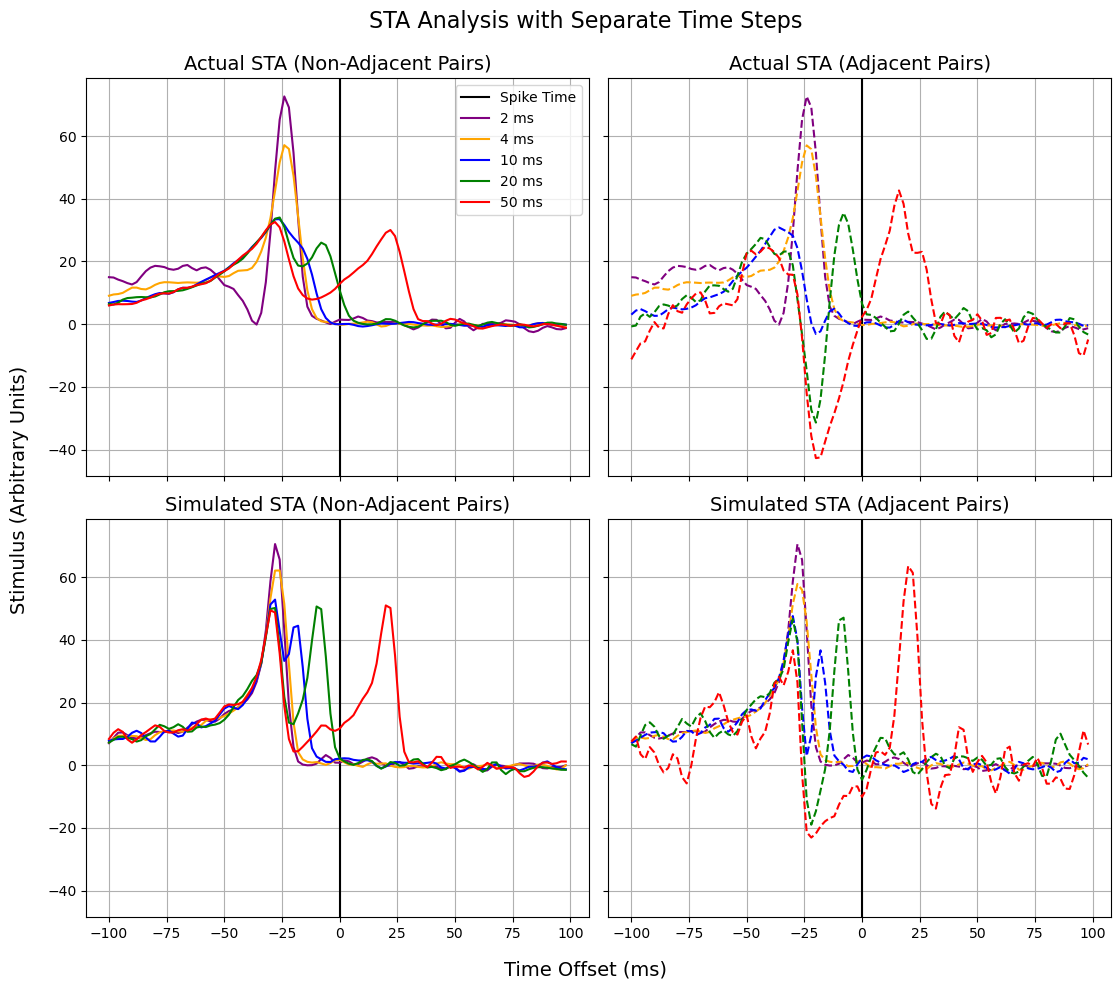

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus and spike train data
rho_file_path = 'rho.dat'
stim_file_path = 'stim.dat'
rho = np.loadtxt(rho_file_path)
stim = np.loadtxt(stim_file_path)

# Constants
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 1.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
bias_current = 20.0  # Constant depolarizing current (nA)
synaptic_strength = 7.0  # Synaptic strength

# Time steps
dt_actual = 2e-3  # Sampling interval for actual data (2 ms)
dt_simulation = 2e-3  # Sampling interval for simulated data

# Time windows and offsets
time_window = 0.1  # 100 ms window
window_steps_actual = int(time_window / dt_actual)
window_steps_simulation = int(time_window / dt_simulation)
time_offsets_actual = np.arange(-window_steps_actual, window_steps_actual) * dt_actual
time_offsets_simulation = np.arange(-window_steps_simulation, window_steps_simulation) * dt_simulation

# Extract spike times from rho.dat
actual_spike_times = np.where(rho == 1)[0] * dt_actual  # Convert indices to time in seconds

# Function to simulate LIF neuron with synaptic delay, noise, and varying time step
def simulate_lif_with_synaptic_delay(stimulus, strength, noise_std, dt_simulation, synaptic_delay):
    T_simulation = len(stim) * dt_simulation  # Total simulation time
    time_simulation = np.arange(0, T_simulation, dt_simulation)  # Time array for simulation

    V = E_L  # Initialize membrane potential
    spikes = []  # Store spike times

    # Calculate the delay in terms of indices
    delay_steps = int(synaptic_delay / dt_simulation)

    for t_idx, t in enumerate(time_simulation):
        # Apply synaptic delay
        if t_idx >= delay_steps:
            delayed_stimulus = stimulus[t_idx - delay_steps]
        else:
            delayed_stimulus = 0  # No input for delayed indices

        # Compute synaptic current with delay
        I_e = strength * delayed_stimulus + bias_current

        # Update membrane potential using Euler's method with noise
        dV = ((E_L - V) + R_m * I_e) * (dt_simulation / tau_m) + np.random.normal(0, noise_std)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)

noise_std = 10
synaptic_delay = 28e-3
simulated_spike_times = simulate_lif_with_synaptic_delay(stim, synaptic_strength, noise_std, dt_simulation, synaptic_delay)

# STA calculation function
def calculate_sta_for_spike_pairs(spike_times, stim, interval, dt, window_steps, adjacent_only=False):
    interval_steps = int(interval / dt)  # Convert interval to steps
    sta = np.zeros(2 * window_steps)  # Initialize STA array
    count = 0

    spike_indices = (spike_times / dt).astype(int)

    if adjacent_only:
        for i in range(len(spike_indices) - 1):
            if spike_indices[i + 1] - spike_indices[i] == interval_steps:
                if spike_indices[i] >= window_steps and spike_indices[i] + window_steps < len(stim):
                    sta += stim[spike_indices[i] - window_steps:spike_indices[i] + window_steps]
                    count += 1
    else:
        for i in range(len(spike_indices)):
            valid_indices = np.where(
                (spike_indices > spike_indices[i]) &
                (spike_indices - spike_indices[i] == interval_steps)
            )[0]
            for j in valid_indices:
                if spike_indices[i] >= window_steps and spike_indices[i] + window_steps < len(stim):
                    sta += stim[spike_indices[i] - window_steps:spike_indices[i] + window_steps]
                    count += 1

    return sta / count if count > 0 else np.zeros_like(sta)

# Calculate STAs
intervals = [2e-3, 4e-3, 10e-3, 20e-3, 50e-3]
stas_actual_adjacent = {}
stas_actual_non_adjacent = {}
stas_simulated_adjacent = {}
stas_simulated_non_adjacent = {}

for interval in intervals:
    stas_actual_adjacent[interval] = calculate_sta_for_spike_pairs(
        actual_spike_times, stim, interval, dt_actual, window_steps_actual, adjacent_only=True
    )
    stas_actual_non_adjacent[interval] = calculate_sta_for_spike_pairs(
        actual_spike_times, stim, interval, dt_actual, window_steps_actual, adjacent_only=False
    )
    stas_simulated_adjacent[interval] = calculate_sta_for_spike_pairs(
        simulated_spike_times, stim, interval, dt_simulation, window_steps_simulation, adjacent_only=True
    )
    stas_simulated_non_adjacent[interval] = calculate_sta_for_spike_pairs(
        simulated_spike_times, stim, interval, dt_simulation, window_steps_simulation, adjacent_only=False
    )

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

for ax in axes.flat:
    ax.axvline(0, color='black', linestyle='-', linewidth=1.5, label="Spike Time")

# Plot Actual Non-Adjacent
axes[0, 0].set_title("Actual STA (Non-Adjacent Pairs)", fontsize=14)
for interval in intervals:
    axes[0, 0].plot(
        time_offsets_actual * 1000,  # Convert to ms
        stas_actual_non_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='-',
    )
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True)

# Plot Actual Adjacent
axes[0, 1].set_title("Actual STA (Adjacent Pairs)", fontsize=14)
for interval in intervals:
    axes[0, 1].plot(
        time_offsets_actual * 1000,
        stas_actual_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='--',
    )
axes[0, 1].grid(True)

# Plot Simulated Non-Adjacent
axes[1, 0].set_title("Simulated STA (Non-Adjacent Pairs)", fontsize=14)
for interval in intervals:
    axes[1, 0].plot(
        time_offsets_simulation * 1000,
        stas_simulated_non_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='-',
    )
axes[1, 0].grid(True)

# Plot Simulated Adjacent
axes[1, 1].set_title("Simulated STA (Adjacent Pairs)", fontsize=14)
for interval in intervals:
    axes[1, 1].plot(
        time_offsets_simulation * 1000,
        stas_simulated_adjacent[interval],
        label=f"{interval * 1000:.0f} ms",
        color=colors[interval],
        linestyle='--',
    )
axes[1, 1].grid(True)

# Add shared labels
fig.supxlabel("Time Offset (ms)", fontsize=14)
fig.supylabel("Stimulus (Arbitrary Units)", fontsize=14)

plt.tight_layout(rect=[0.01, 0.0, 0.95, 0.95])
plt.suptitle("STA Analysis with Separate Time Steps", fontsize=16)
plt.show()
